In [2]:
import importlib
import visualization
importlib.reload(visualization)
from visualization import *

Try different $\sigma_e$

- So far we have assumed known Sigma_e, Sigma_eta
- Model mispecification examples
- Fixed the coverage computation

In [3]:
# Default parameters
default_params = {
    "-l": 0.1,
    "--sigma_eta": 0.01,
    "--p0": 0.05,
    "--sigma_s": 0.1,  # Default for random failure type
    "--coverage_freq": 500,
    "--n_rep": 1000,
    "--seed": 42,
    "--save_path": "./runs/all/",
    "-T": 2500,
    "--name": ""
}

# Define experiments for each failure type
experiments = {
    "failure1": [
        # Experiment 1: vary learning rate
        {"-l": [0.01, 0.1, 1.0], "--env": "failure1"},
        # Experiment 2: vary sigma_eta
        {"--sigma_eta": [0.0, 0.01, 0.1], "--env": "failure1"},
        # Experiment 3: vary p0
        {"--p0": [0.01, 0.05, 0.1, 0.2], "--env": "failure1"},
    ],
    "failure2": [
        # Experiment 1: vary learning rate
        {"-l": [0.01, 0.1, 1.0], "--env": "failure2"},
        # Experiment 2: vary sigma_eta
        {"--sigma_eta": [0.0, 0.01, 0.1], "--env": "failure2"},
        # Experiment 3: vary p0
        {"--p0": [0.01, 0.05, 0.1, 0.2], "--env": "failure2"},
    ],
    "random": [
        # Experiment 1: vary learning rate
        {"-l": [0.01, 0.1, 1.0], "--env": "random"},
        # Experiment 2: vary sigma_eta
        {"--sigma_eta": [0.0, 0.01, 0.1], "--env": "random"},
        # Experiment 3: vary p0
        {"--p0": [0.01, 0.05, 0.1, 0.2], "--env": "random"},
        # Experiment 4: vary sigma_s (only for random)
        {"--sigma_s": [0.01, 0.1, 1.0], "--env": "random"},
    ]
}

UCB 0.833 0.011794532631690002
TS 0.932 0.007960904471226852
MEB 0.948 0.007021111023192901
Boltzmann 0.938 0.007626008130077002
Random 0.948 0.007021111023192901


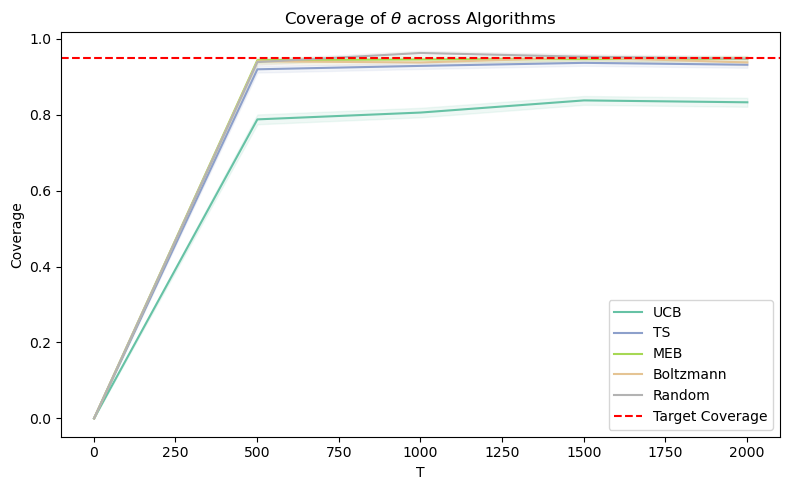

In [6]:
with open('./runs/all/history_dict_%s_l_%s.pkl'%("failure1", 0.01), 'rb') as f:
    history_dict, args = pickle.load(f)
plot_coverage(history_dict, args, echo = True)
    

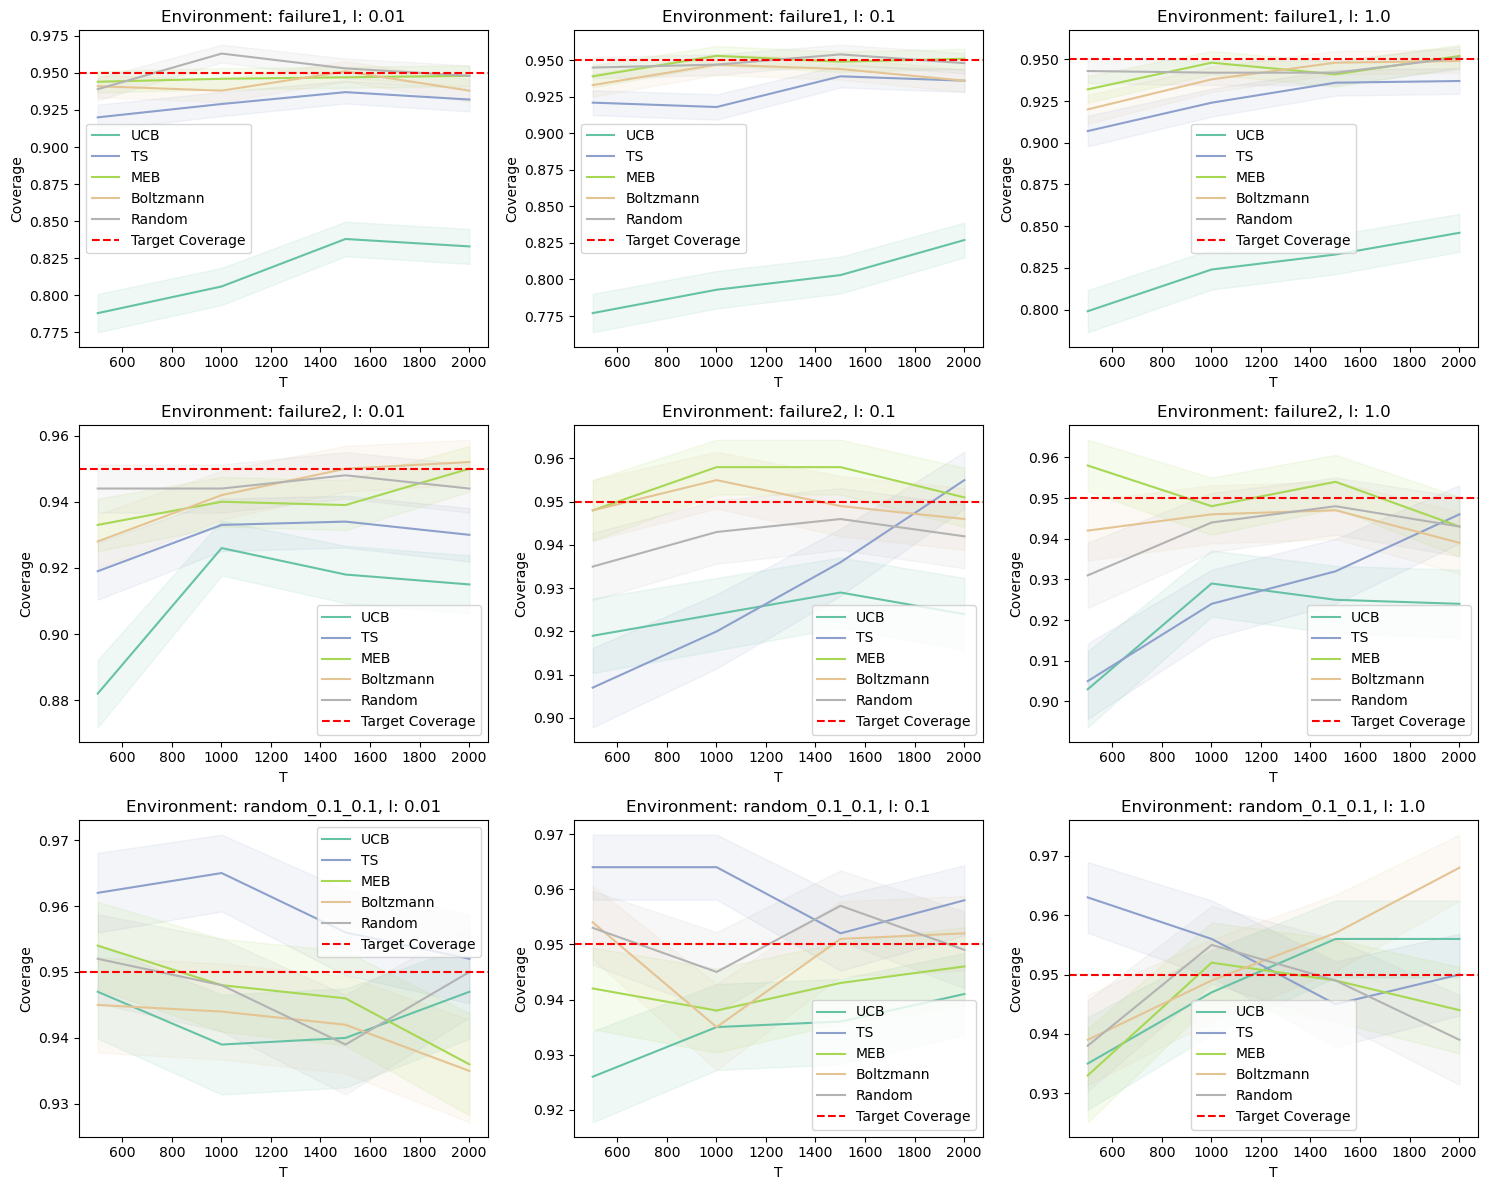

In [7]:
# test the effects of -l
l_list = [0.01, 0.1, 1.0]
env_list = ['failure1', 'failure2', 'random_0.1_0.1']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Counter for subplot position
plot_idx = 0

for env in env_list:
    for l in l_list:
        with open('./runs/all/history_dict_%s_l_%s.pkl'%(env, l), 'rb') as f:
            history_dict, args = pickle.load(f)
        # Get the current subplot
        ax = axes[plot_idx]
        
        # Pass the axis to plot_coverage
        plot_coverage_w_ax(history_dict, args, ax=ax)
        
        # Add title to each subplot
        ax.set_title(f'Environment: {env}, l: {l}')
        
        # Increment plot index
        plot_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()




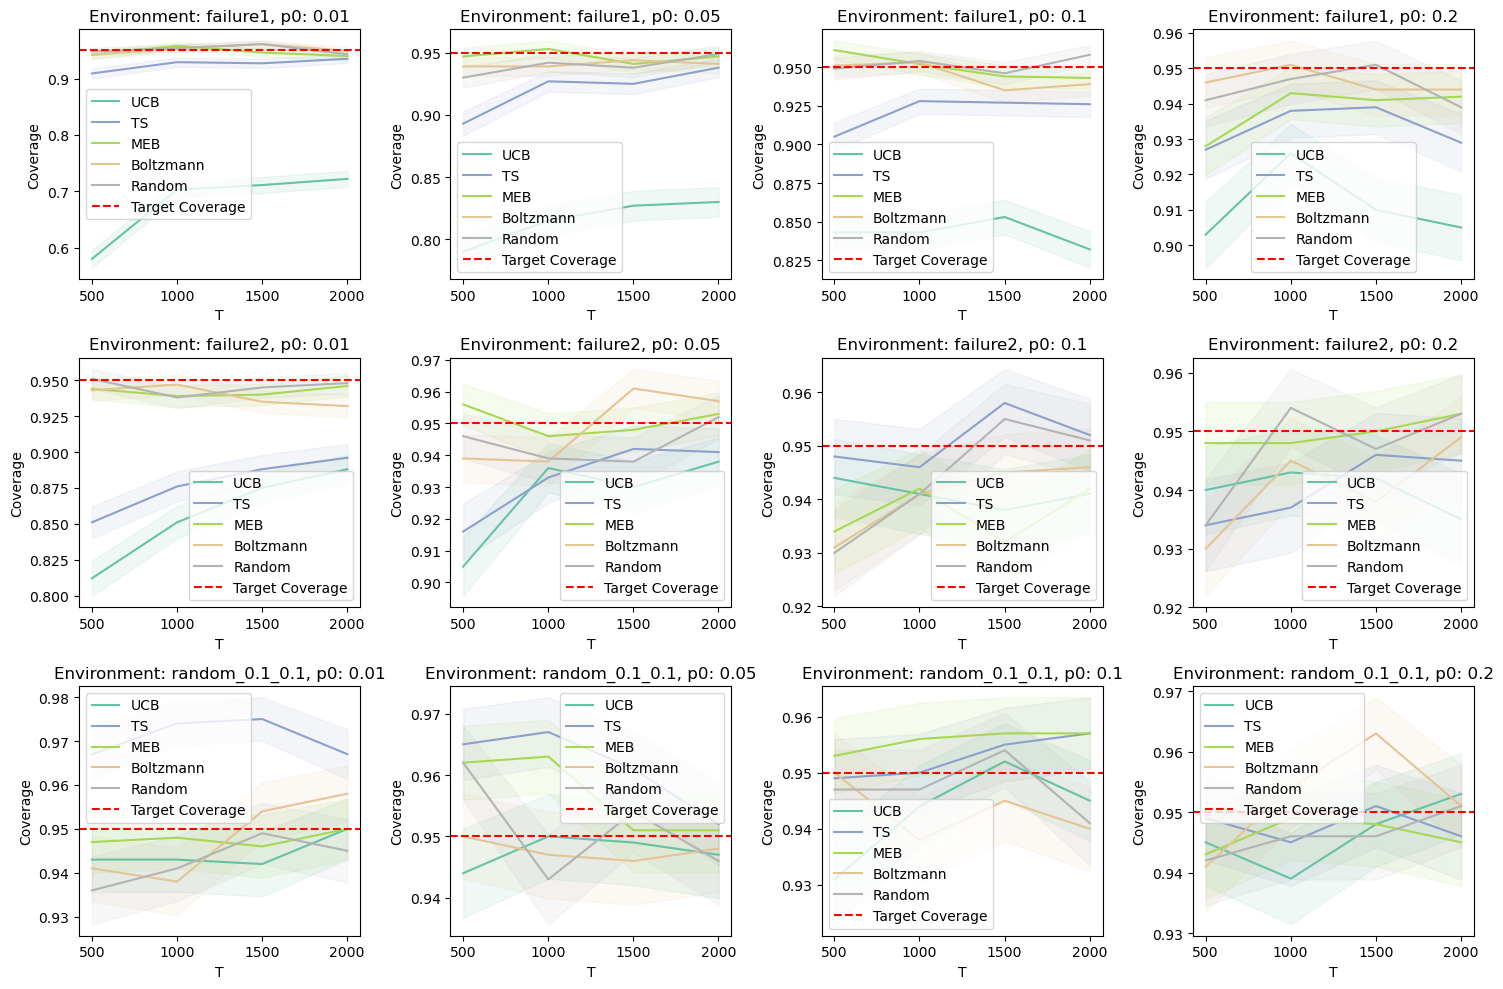

In [8]:
# test the effects of -l
p0_list = [0.01, 0.05, 0.1, 0.2]
env_list = ['failure1', 'failure2', 'random_0.1_0.1']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Counter for subplot position
plot_idx = 0

for env in env_list:
    for p0 in p0_list:
        with open('./runs/all/history_dict_%s_p0_%s.pkl'%(env, p0), 'rb') as f:
            history_dict, args = pickle.load(f)
        # Get the current subplot
        ax = axes[plot_idx]
        
        # Pass the axis to plot_coverage
        plot_coverage_w_ax(history_dict, args, ax=ax)
        
        # Add title to each subplot
        ax.set_title(f'Environment: {env}, p0: {p0}')
        
        # Increment plot index
        plot_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()




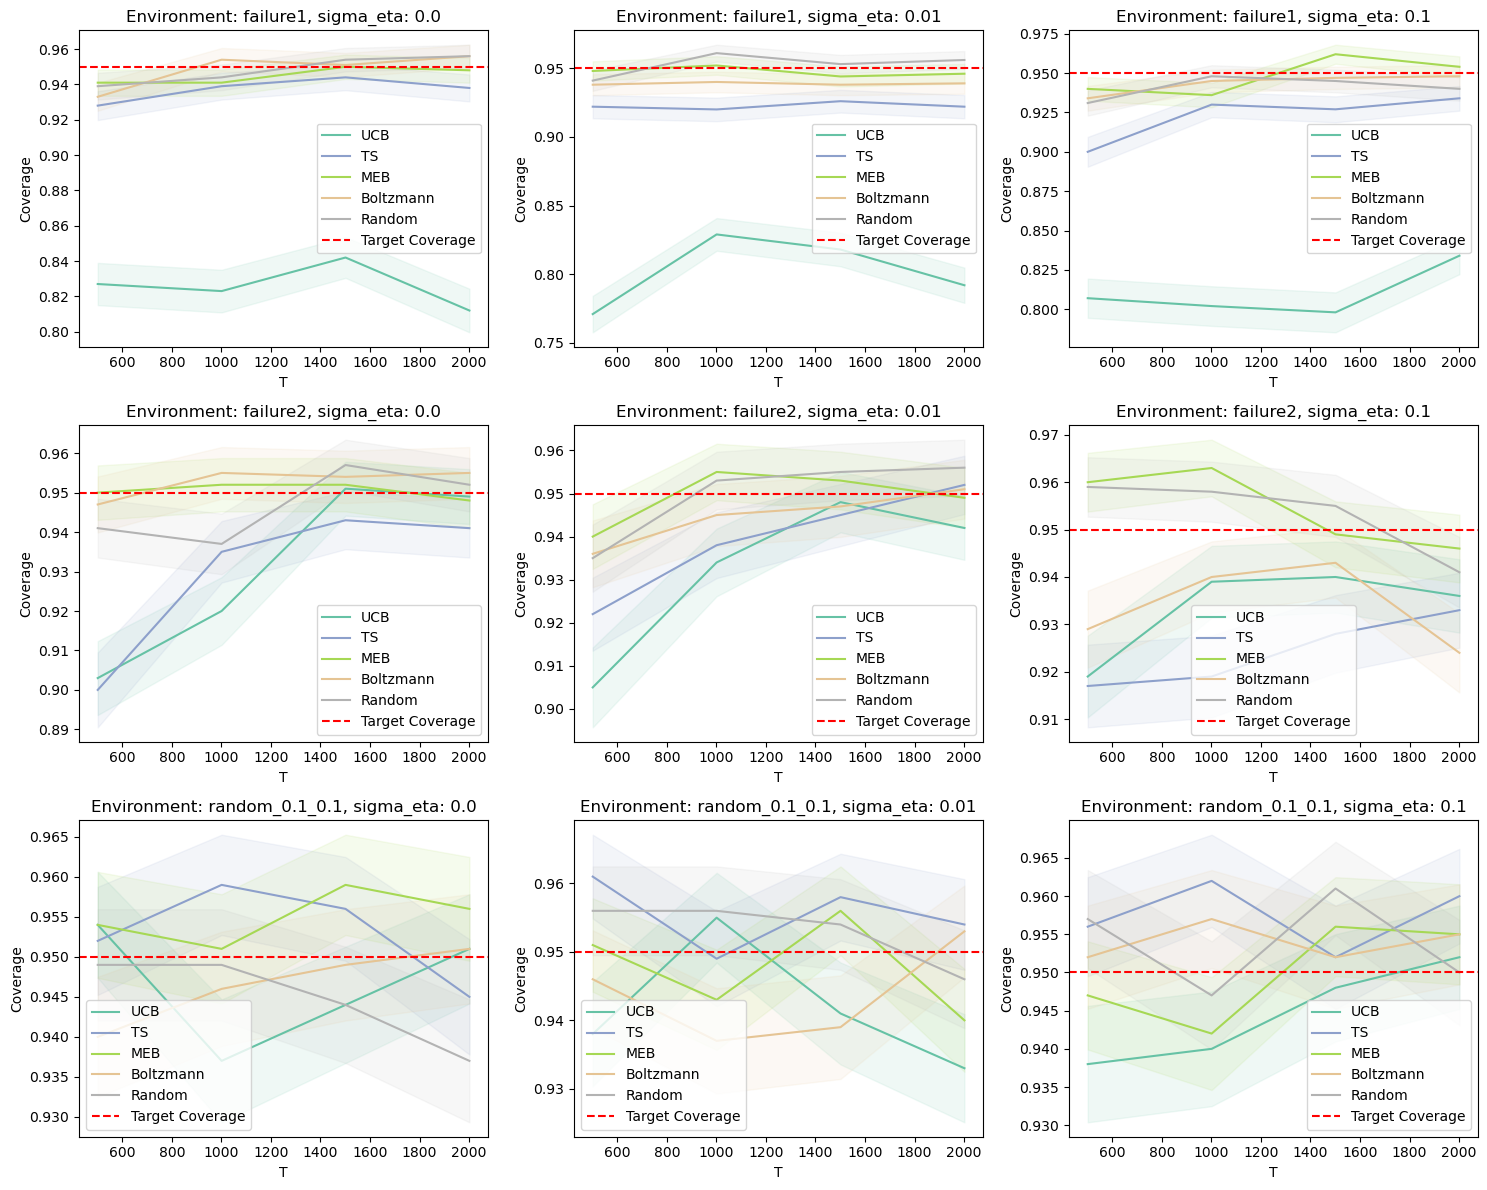

In [9]:
sigma_eta_list = [0.0, 0.01, 0.1]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Counter for subplot position
plot_idx = 0

for env in env_list:
    for sigma_eta in sigma_eta_list:
        with open('./runs/all/history_dict_%s_sigma_eta_%s.pkl'%(env, sigma_eta), 'rb') as f:
            history_dict, args = pickle.load(f)
        # Get the current subplot
        ax = axes[plot_idx]
        
        # Pass the axis to plot_coverage
        plot_coverage_w_ax(history_dict, args, ax=ax)
        
        # Add title to each subplot
        ax.set_title(f'Environment: {env}, sigma_eta: {sigma_eta}')
        
        # Increment plot index
        plot_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

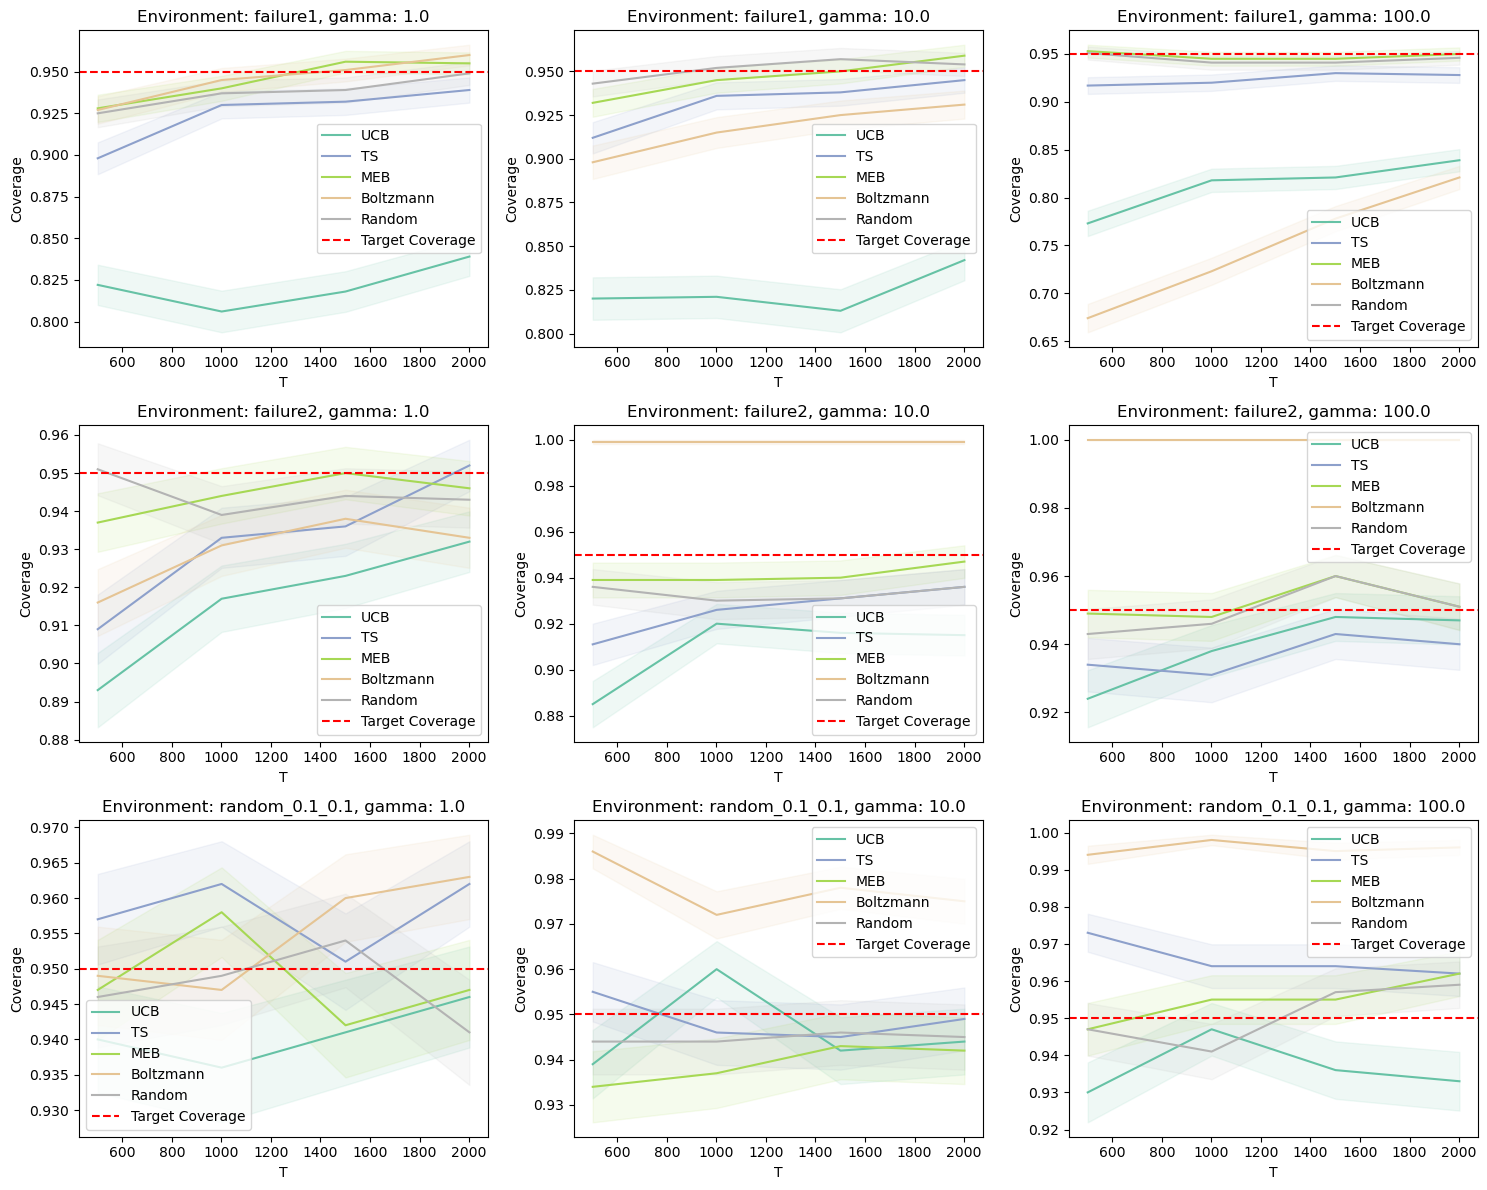

In [11]:
gamma_list = [1.0, 10.0, 100.0]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Counter for subplot position
plot_idx = 0

for env in env_list:
    for gamma in gamma_list:
        with open('./runs/all/history_dict_%s_gamma_%s.pkl'%(env, gamma), 'rb') as f:
            history_dict, args = pickle.load(f)
        # Get the current subplot
        ax = axes[plot_idx]
        
        # Pass the axis to plot_coverage
        plot_coverage_w_ax(history_dict, args, ax=ax)
        
        # Add title to each subplot
        ax.set_title(f'Environment: {env}, gamma: {gamma}')
        
        # Increment plot index
        plot_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

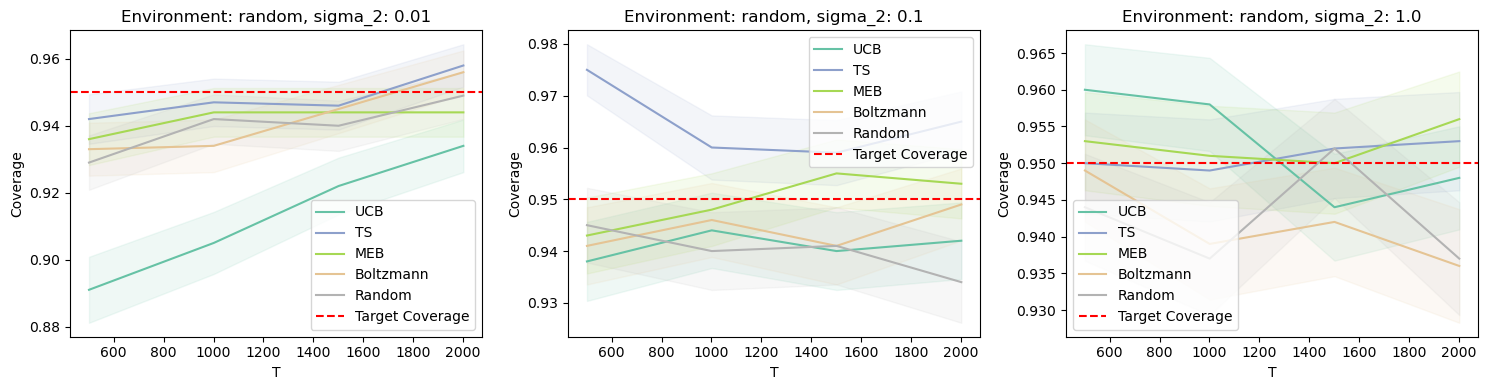

In [8]:
sigma_2_list = [0.01, 0.1, 1.0]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Counter for subplot position
plot_idx = 0

# for env in ['random_0.1_0.1']:
for sigma_2 in sigma_2_list:
    with open('./runs/all/history_dict_random_%s_0.1_sigma_s_%s.pkl'%(sigma_2,sigma_2), 'rb') as f:
        history_dict, args = pickle.load(f)
    # Get the current subplot
    ax = axes[plot_idx]
        
    # Pass the axis to plot_coverage
    plot_coverage_w_ax(history_dict, args, ax=ax)
        
    # Add title to each subplot
    ax.set_title(f'Environment: random, sigma_2: {sigma_2}')
        
    # Increment plot index
    plot_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()